Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = "NONE"

# Boundary value problems: linear case and matrices
When the BVP is linear, you can solve it either using the interpolation already shown, or by formulating the problem as a matrix system. The later is based on a [finite difference](https://en.wikipedia.org/wiki/Finite_difference_method) discretization for the derivatives. Let's start with the following problem, representing the temperature $T$ across a linear bar (Chapra, 27.1)
\begin{equation}
\frac{d^2T}{dx^2} + h'(T_a - T) = 0,  
\end{equation}
where $h'$ is the transfer coefficient (m$^{-2}$), and $T_a$ is the sourronding air temperature. The boundary conditions are $T(0) = T_1 = 40$, $T(L=10) = t_2 = 200$, and $T_a = 20$. Also, $h' = 0.01$. 

First, please solve the problem both theoretically and then using `solve_bvp` or yout own method.

Now let's proceed with a different way: by discretizing the derivatives and setting the equation on the points. We have,

\begin{equation}
\frac{d^2T}{dx^2} \simeq \frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta x^2},  
\end{equation}
where $\Delta x$ is the partition size, so the original equation takes the form
\begin{equation}
\frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta x^2} - h'(T_i - T_a) = 0.  
\end{equation}
Finally, after collecting terms, we have
\begin{equation}
-T_{i-1} + (2+h'\Delta x^2)T_i - T_{i+1} = h'\Delta x^2T_a \to -T_{i-1} + \alpha T_i - T_{i+1} = \beta.
\end{equation}
This is a tri-diagonal system for the internal points.

YOUR ANSWER HERE

In [ ]:
import numpy as np
def diag(M,a):
    
    for i in range(N):
        
        M[i,i] = a

        if i < N - 1: 
            M[i+1,i],M[i,i+1]=-1,-1

    #print(M)
from scipy.sparse import diags

    
def diag2(ALPHA,N):#La más optima
    diags([-1, ALPHA, -1], [-1, 0, 1], shape=(N, N)).toarray()

In [ ]:
N=5
M = np.zeros((N, N))
diag(M,5)

[[ 5. -1.  0.  0.  0.]
 [-1.  5. -1.  0.  0.]
 [ 0. -1.  5. -1.  0.]
 [ 0.  0. -1.  5. -1.]
 [ 0.  0.  0. -1.  5.]]


In [ ]:

"""
Manuel Herrera
Diego Contreras
Cristian Peña
Andres Villalba
"""


import numpy as np
import scipy as sp
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt

def solve_bvp_finite_diffs(N, ALPHA, BETA, T1, T2):
    """
    N : number of internal points
    """
    M = np.zeros((N, N))
    b = BETA*np.ones(N) 

    b[0] = b[0] + T1
    b[-1] = b[-1] + T2
    # Set diagonal elements

    diag(M,ALPHA)
    
    x = np.linalg.solve(M, b)

    return np.concatenate(([T1], x, [T2]))

HPRIME = 0.01
L = 10
N = 30
DX = L/(N+2-1) # +2 by adding the boundaries -1 by number of intervals
TA = 20
T1 = 40
T2 = 200
ALPHA = 2 + HPRIME*DX*DX
BETA = HPRIME*DX*DX*TA

T = solve_bvp_finite_diffs(N, ALPHA, BETA, T1, T2)

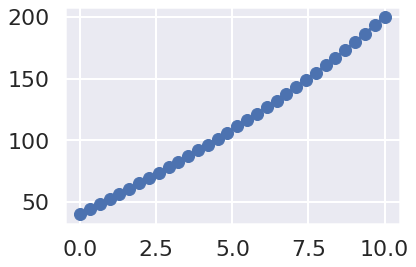

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('poster')
x = DX*np.arange(N+2)
plt.plot(x, T, '-o')


# Exercises

## Generic BVP 
Solve the following equation using the shooting method and the matrix method,
\begin{equation}
7\frac{d^2y}{dx^2} -  2\frac{dy}{dx} - y +x = 0,
\end{equation}
with $y(0) = 5, y(20) = 8$




## BVP with Newman condition
Here we will add a boundary condition on the derivative, on the left, which means that the left node is also an unknown. In that case you can use $dT/dx \simeq = (T_{1} - T_{-1})/2\Delta x$ so $T_{-1} = T_1 -2 \Delta x dT/\Delta x$ and then you get the value for the imaginary node $T_{-1}$ which is now needed. Solve following system:
\begin{equation}
\frac{d^2T}{dr^2} + \frac{1}{r}\frac{dT}{dr} + S = 0,
\end{equation}
over $0 \le r\le 1$, with $T(r=1) = 1$ and $\frac{dT}{dr} = 0$ in $r=0$, for S = 1, 10, and 20 K/m$^2$. This is a model of the temperature distribution on  a circular rod with internal heat source $S$. 

## Deflection of a sailboat mast (Chapra 28.22)
The following equation can be used to model the deflection of a sailboat mast subject to wind force,
\begin{equation}
\frac{d^2y}{dz^2} = \frac{f}{2EI}(L-z)^2,
\end{equation}
where $f$ is the wind force, $E$ is the modulus of elasticity, $L$ the mast length, and $I$ the inertia moment. Compute the deflection as a function of $z$ if $y = 0$ and $dy/dz = 0$ at $z = 0$. Use $f = 60, L = 30, E = 1.25\times 10^8, I = 0.05$

## Deflection of a sailboat mast (Chapra 28.23)
Same previous problem but now the force varies with height as 
\begin{equation}
f(z) = \frac{200z}{5+z}e^{-2z/30}.
\end{equation}